In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.linspace(0,50,501)

In [ ]:
y = np.sin(x)

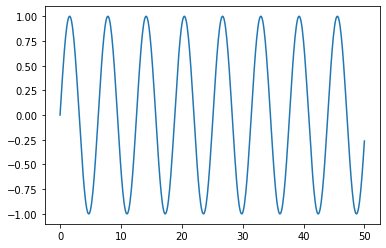

In [ ]:
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data = y, index = x, columns = ['Sine'])

In [ ]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
len(df)

501

In [ ]:
test_percent = 0.1

In [ ]:
len(df)*test_percent

50.1

In [ ]:
test_point = np.round(len(df)*test_percent)

In [ ]:
test_point

50.0

In [ ]:
test_ind = int(len(df)-test_point)

In [ ]:
test_ind

451

In [ ]:
train = df.iloc[:test_ind]

In [ ]:
test = df.iloc[test_ind:]

In [ ]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [ ]:
# need to scale input since fed back into itslef 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#help(TimeseriesGenerator)

In [ ]:
length = 25 # should be enough for networks to pick up on repeating effects 
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length = length, batch_size = batch_size)

In [ ]:
len(scaled_train)

451

In [ ]:
len(generator) # scaled train - length

426

In [ ]:
X,y = generator[0]

In [ ]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [ ]:
y 

array([[0.79923759]])

In [ ]:
#scaled_train

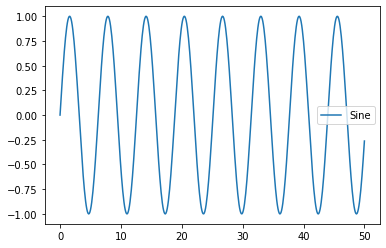

In [ ]:
df.plot()

In [ ]:
length = 50 # should be enough for networks to pick up on repeating effects 
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length = length, batch_size = batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator, epochs = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
401/401 [==============================] - 6s 11ms/step - loss: 0.0037
Epoch 2/5
401/401 [==============================] - 5s 11ms/step - loss: 3.0351e-04
Epoch 3/5
401/401 [==============================] - 4s 10ms/step - loss: 3.2595e-05
Epoch 4/5
401/401 [==============================] - 4s 9ms/step - loss: 1.9378e-04
Epoch 5/5
401/401 [==============================] - 4s 9ms/step - loss: 1.1170e-04


In [ ]:
losses = pd.DataFrame(model.history.history)

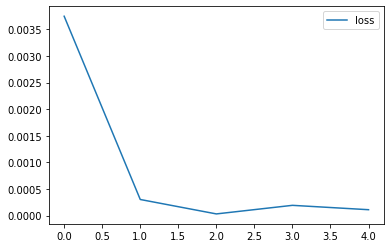

In [ ]:
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.95177287]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94955134])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))



In [ ]:
#predicted_value = [[[99]]].   
#np.append(current_batch[:,1:,:], [[[99]]], axis = 1) #moves timstamp by one point 

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)


In [ ]:
#test_predictions

In [ ]:
#scaled_test

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


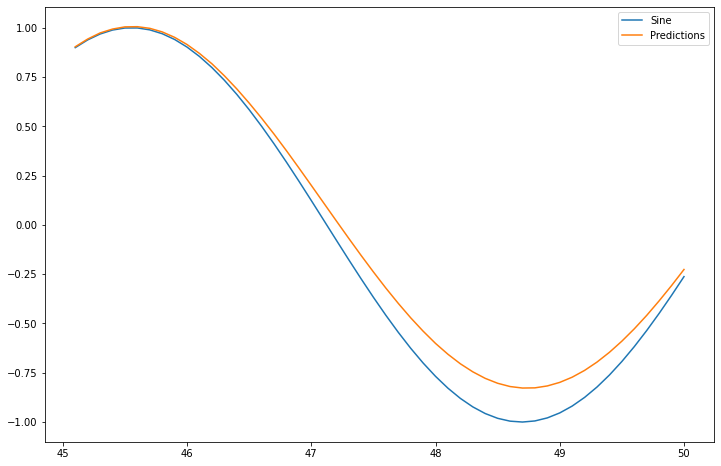

In [ ]:
test.plot(figsize = (12,8))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience =2)

In [ ]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length = length, batch_size = 1)


validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length = length, batch_size =1)

In [ ]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(generator, epochs = 20, 
                    validation_data = validation_generator, 
                    callbacks = [early_stop])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


402/402 [==============================] - 12s 23ms/step - loss: 0.0184 - val_loss: 1.1116e-04
Epoch 2/20
402/402 [==============================] - 8s 21ms/step - loss: 6.1724e-05 - val_loss: 7.6916e-06
Epoch 3/20
402/402 [==============================] - 8s 20ms/step - loss: 1.8544e-04 - val_loss: 1.3027e-05
Epoch 4/20
402/402 [==============================] - 8s 20ms/step - loss: 1.1171e-04 - val_loss: 1.2819e-05


In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


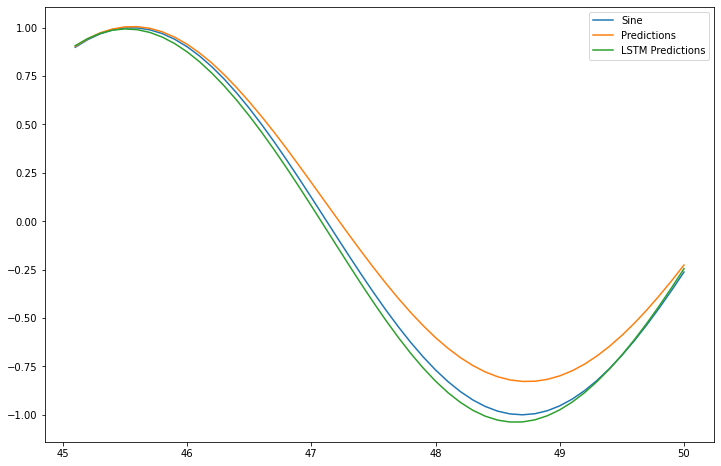

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize = (12,8))

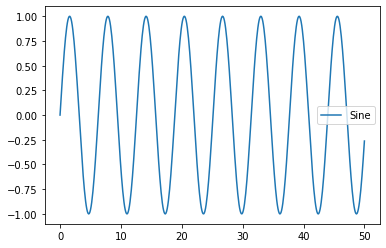

In [ ]:
df.plot()

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, 
                                length = length, batch_size = 1 )

In [ ]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(generator, epochs = 4)

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


452/452 [==============================] - 12s 20ms/step - loss: 0.0169
Epoch 2/4
452/452 [==============================] - 9s 21ms/step - loss: 2.7015e-04
Epoch 3/4
452/452 [==============================] - 9s 21ms/step - loss: 1.4669e-04
Epoch 4/4
452/452 [==============================] - 9s 21ms/step - loss: 1.7942e-04


In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
25*0.1. # add to 50.1

2.5

In [ ]:
forecast_ind = np.arange(50.1, 52.6, step =0.1)

In [ ]:
len(forecast_ind)

25

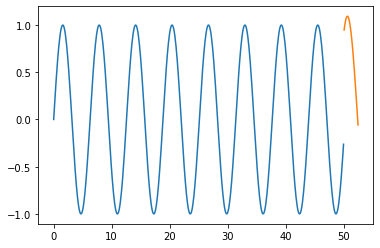

In [ ]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_ind, forecast)